In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

dataset = pd.read_csv('dataset/lyrics_train.csv', engine='python')
feature = dataset['lyrics']
target = dataset['genre']

X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.2, random_state=0)

print('finish')

finish


In [2]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

class LemmaTokenizer(object):
    
    def __init__(self):
        
        self.wnl = WordNetLemmatizer()
    
    def __call__(self,doc):
        
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

print('finish')

finish


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords


stopWords = stopwords.words('english')
stop_words = text.ENGLISH_STOP_WORDS

count_vect = CountVectorizer(tokenizer=LemmaTokenizer(),stop_words=stopWords,ngram_range=(1,3),max_features=250)
X_train_counts = count_vect.fit_transform(X_train)

print('finish')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


finish


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


print('finish')

finish


In [21]:
from sklearn import metrics
from sklearn.cluster import KMeans


# TODO - Data preprocessing and clustering
# TODO - Set Randomness parameters to specific value(ex: random_state in KMeans etc.) Or Save KMeans model to pickle file

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train_tfidf)


print(metrics.v_measure_score(Y_train, kmeans.labels_))

0.02502889823357937


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


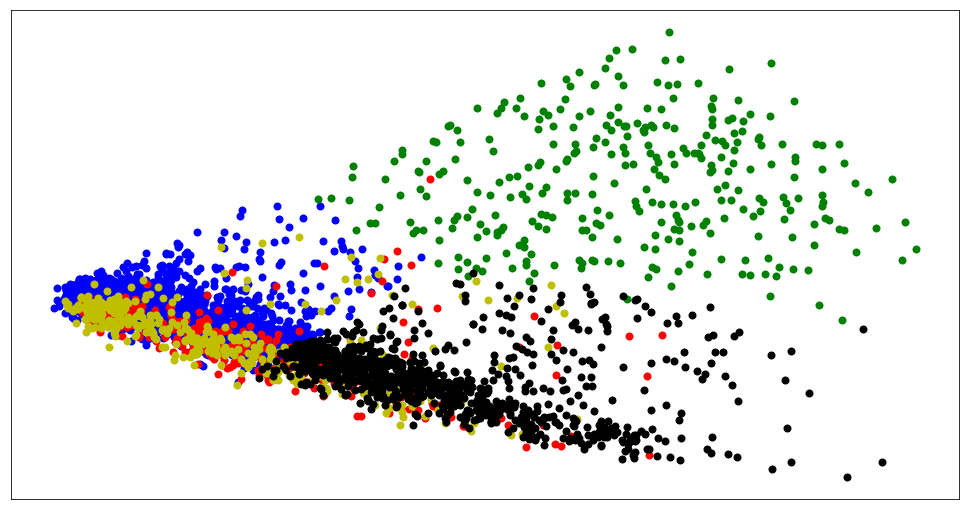

In [22]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


clusters = kmeans.labels_.tolist()
labels = Y_train

colors = {0: 'b', 1: 'g', 2: 'r', 3: 'y', 4:'k'}

pca = PCA(n_components=2).fit_transform(X_train_tfidf.toarray())
xs, ys = pca[:, 0], pca[:, 1]

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
colors = {0: 'b', 1: 'g', 2: 'r', 3: 'y', 4:'k'}


#df = pd.DataFrame(dict(x=xs, y=ys, label=labels))
#colors = {'Country': 'b', 'Jazz': 'g', 'Pop': 'r', 'R&B': 'y', 'Rock':'k'}

groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
for idx, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
            color=colors[idx], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
plt.show() #show the plot